## Introduction

<p> The datasets now made available were collected aiming at the development of prediction models to classify a hotel booking׳s likelihood to be canceled. <br>
Nevertheless, due to the characteristics of the variables included in these datasets, their use goes beyond this cancellation prediction problem. <br>
One of the most important properties in data for prediction models is not to promote leakage of future information. <br> In order to prevent this from happening, the timestamp of the target variable must occur after the input variables’ timestamp. <br> Thus, instead of directly extracting variables from the bookings database table, when available, the variables’ values were extracted from the bookings change log, <br> with a timestamp relative to the day prior to arrival date (for all the bookings created before their arrival date). </p>

### Libraries

In [49]:
import pandas as pd 
import seaborn as sns
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
style.use('seaborn-poster')
style.use('ggplot')
import plotly.express as px
import seaborn as sn

# Algorithms
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier)
from sklearn.neural_network import MLPClassifier

from xgboost import plot_tree
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from time import time
from time import sleep
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score

# RNN
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from tensorflow.keras.layers import  Dense,  BatchNormalization, Dropout, Flatten
from tensorflow.keras.models import Sequential, load_model
from keras import backend as K
from keras.optimizers import Adam, SGD


#Shap & Eli5
import shap
import eli5 as eli


#Categories
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

In [50]:
df = pd.read_csv('hotel_bookings.csv')
df = df.reindex(sorted(df.columns), axis = 1)
df

,adr,adults,agent,arrival_date_day_of_month,arrival_date_month,arrival_date_week_number,arrival_date_year,assigned_room_type,babies,booking_changes,...,meal,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,reservation_status,reservation_status_date,reserved_room_type,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
0,0.00,2,NaN,1,July,27,2015,C,0,3,...,BB,0,0,0,Check-Out,2015-07-01,C,0,0,0
1,0.00,2,NaN,1,July,27,2015,C,0,4,...,BB,0,0,0,Check-Out,2015-07-01,C,0,0,0
2,75.00,1,NaN,1,July,27,2015,C,0,0,...,BB,0,0,0,Check-Out,2015-07-02,A,1,0,0
3,75.00,1,304.0,1,July,27,2015,A,0,0,...,BB,0,0,0,Check-Out,2015-07-02,A,1,0,0
4,98.00,2,240.0,1,July,27,2015,A,0,0,...,BB,0,0,0,Check-Out,2015-07-03,A,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,96.14,2,394.0,30,August,35,2017,A,0,0,...,BB,0,0,0,Check-Out,2017-09-06,A,5,2,0
119386,225.43,3,9.0,31,August,35,2017,E,0,0,...,BB,0,0,0,Check-Out,2017-09-07,E,5,2,2
119387,157.71,2,9.0,31,August,35,2017,D,0,0,...,BB,0,0,0,Check-Out,2017-09-07,D,5,2,4
119388,104.40,2,89.0,31,August,35,2017,A,0,0,...,BB,0,0,0,Check-Out,2017-09-07,A,5,2,0


<ul>
  <li>adr: Average Daily Rate </li>
  <li>agent: ID of travel agency</li>
  <li>DaysInWaitingList: Number of days the booking was in the waiting list before it was confirmed to the customer</li>
  <li>DistributionChannel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”</li>
  <li>LeadTime: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date</li>
  <li>Meal: Undefined/SC – no meal package;
            BB – Bed & Breakfast;
HB – Half board (breakfast and one other meal – usually dinner);
FB – Full board (breakfast, lunch and dinner)</li>    
</ul>
<br>
<br>

<p>Company has the 94% of na values, I decide to remove it </p>

In [51]:
df.isna().sum()/119390*100

adr                                0.000000
adults                             0.000000
agent                             13.686238
arrival_date_day_of_month          0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_year                  0.000000
assigned_room_type                 0.000000
babies                             0.000000
booking_changes                    0.000000
children                           0.003350
company                           94.306893
country                            0.408744
customer_type                      0.000000
days_in_waiting_list               0.000000
deposit_type                       0.000000
distribution_channel               0.000000
hotel                              0.000000
is_canceled                        0.000000
is_repeated_guest                  0.000000
lead_time                          0.000000
market_segment                     0.000000
meal                            

In [52]:
del df['company']

In [53]:
na_cols = df.isna().any()
na_cols = na_cols[na_cols == True].reset_index()

na_cols = na_cols["index"].tolist()
for col in df.columns[1:]:
     if col in na_cols:
        if df[col].dtype != 'object':
             df[col] =  df[col].fillna(df[col].mean()).round(0)

In [54]:
df.isna().any()

adr                               False
adults                            False
agent                             False
arrival_date_day_of_month         False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_year                 False
assigned_room_type                False
babies                            False
booking_changes                   False
children                          False
country                            True
customer_type                     False
days_in_waiting_list              False
deposit_type                      False
distribution_channel              False
hotel                             False
is_canceled                       False
is_repeated_guest                 False
lead_time                         False
market_segment                    False
meal                              False
previous_bookings_not_canceled    False
previous_cancellations            False
required_car_parking_spaces       False


<p>Now, I remove the all na rows from the dataset </p>

In [55]:
df = df.dropna()
df.isna().sum()/119390*100

adr                               0.0
adults                            0.0
agent                             0.0
arrival_date_day_of_month         0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_year                 0.0
assigned_room_type                0.0
babies                            0.0
booking_changes                   0.0
children                          0.0
country                           0.0
customer_type                     0.0
days_in_waiting_list              0.0
deposit_type                      0.0
distribution_channel              0.0
hotel                             0.0
is_canceled                       0.0
is_repeated_guest                 0.0
lead_time                         0.0
market_segment                    0.0
meal                              0.0
previous_bookings_not_canceled    0.0
previous_cancellations            0.0
required_car_parking_spaces       0.0
reservation_status                0.0
reservation_

In [56]:
df.dtypes

adr                               float64
adults                              int64
agent                             float64
arrival_date_day_of_month           int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_year                   int64
assigned_room_type                 object
babies                              int64
booking_changes                     int64
children                          float64
country                            object
customer_type                      object
days_in_waiting_list                int64
deposit_type                       object
distribution_channel               object
hotel                              object
is_canceled                         int64
is_repeated_guest                   int64
lead_time                           int64
market_segment                     object
meal                               object
previous_bookings_not_canceled      int64
previous_cancellations            

### Plot Histogram of numeric Columns

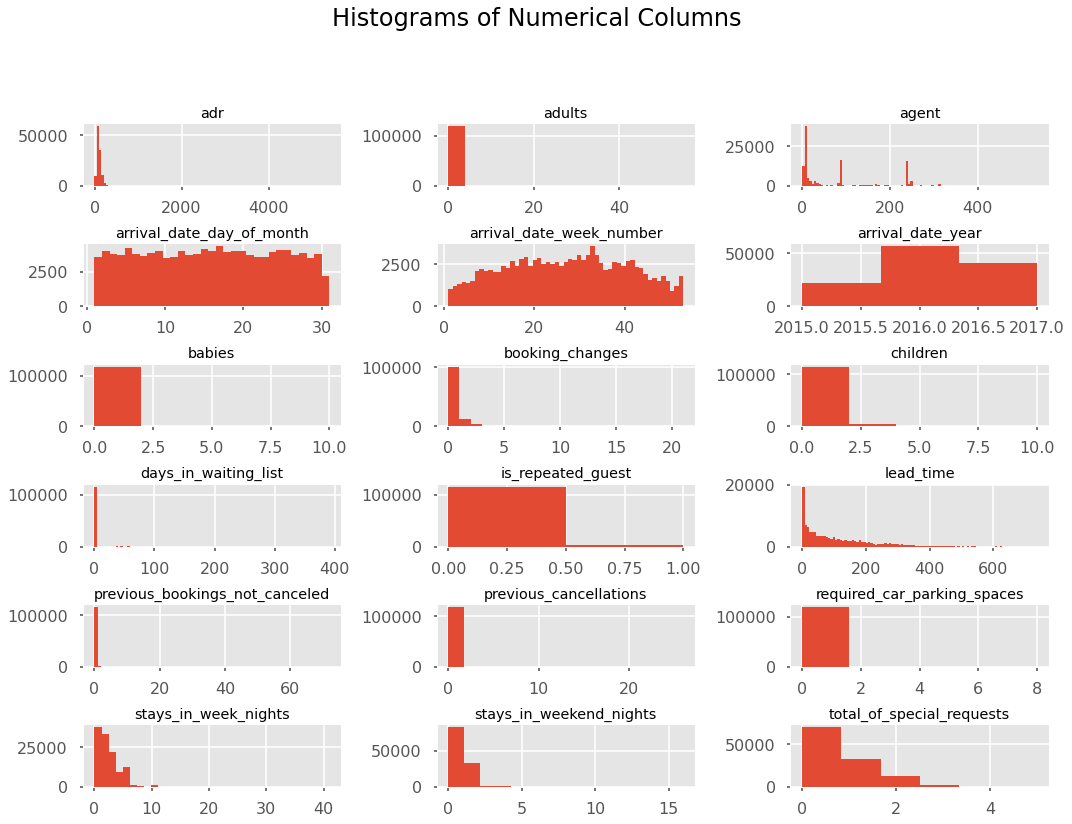

In [57]:
dataset2 = df[['adr', 'adults', 'agent', 'arrival_date_day_of_month',
       'arrival_date_week_number', 'arrival_date_year', 'babies',
        'booking_changes', 'children', 'days_in_waiting_list',
       'is_repeated_guest', 'lead_time', 'previous_bookings_not_canceled',
        'previous_cancellations','required_car_parking_spaces',
        'stays_in_week_nights','stays_in_weekend_nights','total_of_special_requests']]


    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment = "center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [58]:
df.reset_index(inplace = True)

In [59]:
df.head()

,index,adr,adults,agent,arrival_date_day_of_month,arrival_date_month,arrival_date_week_number,arrival_date_year,assigned_room_type,babies,...,meal,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,reservation_status,reservation_status_date,reserved_room_type,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
0,0,0.0,2,87.0,1,July,27,2015,C,0,...,BB,0,0,0,Check-Out,2015-07-01,C,0,0,0
1,1,0.0,2,87.0,1,July,27,2015,C,0,...,BB,0,0,0,Check-Out,2015-07-01,C,0,0,0
2,2,75.0,1,87.0,1,July,27,2015,C,0,...,BB,0,0,0,Check-Out,2015-07-02,A,1,0,0
3,3,75.0,1,304.0,1,July,27,2015,A,0,...,BB,0,0,0,Check-Out,2015-07-02,A,1,0,0
4,4,98.0,2,240.0,1,July,27,2015,A,0,...,BB,0,0,0,Check-Out,2015-07-03,A,2,0,1


### Overall Cancelletion  Rate

C:\Users\testa\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



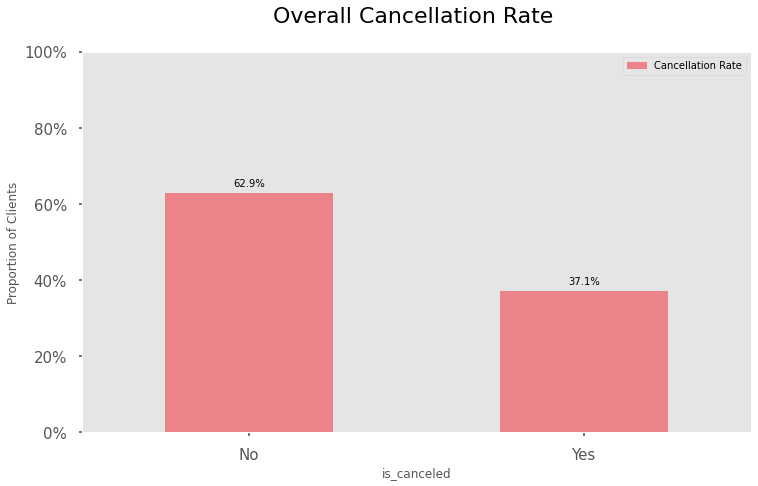

In [60]:
import matplotlib.ticker as mtick
rate = df[["is_canceled", "index"]]
rate ["is_canceled"] = pd.Series(np.where((rate["is_canceled"] == 0), "No", "Yes"))
sectors = rate .groupby ("is_canceled")
rate = pd.DataFrame(sectors["index"].count())
rate ["Cancellation Rate"] = (rate ["index"] / sum(rate ["index"]) )*100
ax =  rate[["Cancellation Rate"]].plot.bar(title = 'Overall Cancellation Rate', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color = '#ec838a', fontsize = 15, stacked=False, ylim =(0,100))

plt.ylabel('Proportion of Clients',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('is_canceled',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Cancellation Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(rate[["index"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        
        label = "{:.1f}%".format(y_value)    
        ax.annotate(
            label,                      
            (x_value, y_value),        
            xytext=(0, space),         
            textcoords="offset points", 
            ha='center',                
            va=va)                                                            
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False) 

<p> Correlation from variables, We don't see any tipe of significant correlation</p>

In [61]:
df.corr()

,index,adr,adults,agent,arrival_date_day_of_month,arrival_date_week_number,arrival_date_year,babies,booking_changes,children,days_in_waiting_list,is_canceled,is_repeated_guest,lead_time,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
index,1.000000,0.144122,-0.014597,-0.568682,0.009137,-0.054291,0.298836,-0.027918,-0.006747,-0.021127,-0.015397,-0.246253,-0.018973,0.003123,0.004716,-0.018165,-0.129121,-0.208210,-0.150126,0.105453
adr,0.144122,1.000000,0.227431,-0.022097,0.029980,0.075256,0.197919,0.028594,0.019217,0.325033,-0.041325,0.046133,-0.135374,-0.066332,-0.069631,-0.065922,0.058063,0.063647,0.047319,0.171404
adults,-0.014597,0.227431,1.000000,-0.027498,-0.001864,0.025402,0.029107,0.017884,-0.052427,0.029584,-0.008768,0.058408,-0.147496,0.116773,-0.105028,-0.006976,0.016364,0.091991,0.090392,0.121844
agent,-0.568682,-0.022097,-0.027498,1.000000,0.001628,-0.028227,0.059152,0.033713,0.059862,0.039533,-0.054649,-0.077122,0.020051,-0.064677,0.006224,-0.010279,0.152003,0.170832,0.132361,0.031609
arrival_date_day_of_month,0.009137,0.029980,-0.001864,0.001628,1.000000,0.066824,-0.000531,-0.000536,0.010779,0.014571,0.022741,-0.006173,-0.006334,0.002354,0.000121,-0.027009,0.008271,-0.027589,-0.015903,0.003050
arrival_date_week_number,-0.054291,0.075256,0.025402,-0.028227,0.066824,1.000000,-0.540488,0.010038,0.005183,0.005490,0.022992,0.007481,-0.030414,0.126724,-0.020769,0.035366,0.001714,0.015006,0.017640,0.025788
arrival_date_year,0.298836,0.197919,0.029107,0.059152,-0.000531,-0.540488,1.000000,-0.013178,0.031141,0.054504,-0.056813,0.016339,0.010137,0.039974,0.029804,-0.119911,-0.012646,0.031759,0.021678,0.108873
babies,-0.027918,0.028594,0.017884,0.033713,-0.000536,0.010038,-0.013178,1.000000,0.083221,0.024131,-0.010648,-0.032523,-0.008954,-0.021146,-0.006305,-0.007489,0.036971,0.020157,0.018397,0.097597
booking_changes,-0.006747,0.019217,-0.052427,0.059862,0.010779,0.005183,0.031141,0.083221,1.000000,0.048663,-0.011660,-0.144669,0.012166,0.000014,0.011971,-0.027091,0.065727,0.095664,0.062402,0.052423
children,-0.021127,0.325033,0.029584,0.039533,0.014571,0.005490,0.054504,0.024131,0.048663,1.000000,-0.033395,0.004740,-0.032988,-0.038326,-0.020364,-0.024751,0.057063,0.044260,0.045431,0.081777


<AxesSubplot:>

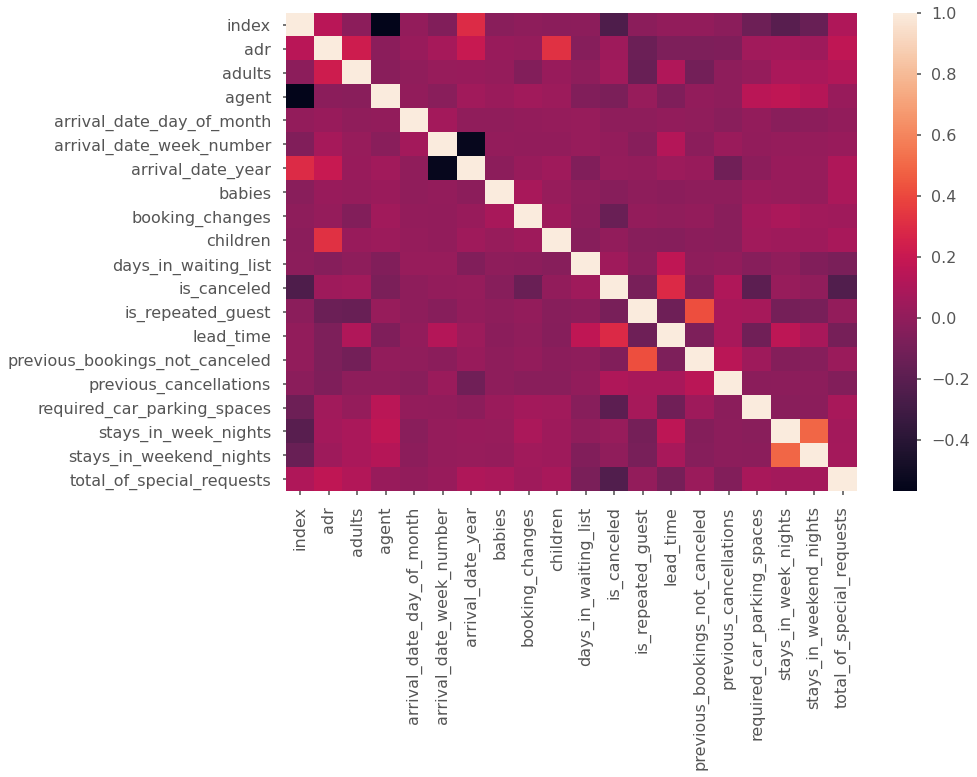

In [62]:
sns.heatmap(df.corr(), 
        xticklabels = df.corr().columns,
        yticklabels = df.corr().columns)

## Feature Engineering and EDA

<p> Canculation of the number of cancellation per day </p>

In [63]:
df_canceled = df.copy()

In [64]:
df_canceled['datetime'] = pd.to_datetime(df_canceled['arrival_date_year'].map(str) + " " + df_canceled['arrival_date_month'].map(str) + " " + df_canceled['arrival_date_day_of_month'].map(str))
df['datetime'] = pd.to_datetime(df['arrival_date_year'].map(str) + " " + df['arrival_date_month'].map(str) + " " + df['arrival_date_day_of_month'].map(str))
del df['arrival_date_year']
del df['arrival_date_month']
del df['arrival_date_day_of_month']

C:\Users\testa\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
df_canceled = df_canceled[df_canceled['is_canceled'] == 1]

In [66]:
df_canceled = pd.DataFrame(df_canceled.groupby('datetime').count()['is_canceled'])

In [67]:
df_canceled.reset_index(inplace = True)

In [68]:
df_canceled.columns = ['datetime', 'number_of_cancellation']

In [69]:
df = df_canceled.merge(df)

<p> Total number of people in family </p>

In [70]:
df['family'] = df['adults'] + df['babies'] + df['children']


In [71]:
#Drop rows where family = 0 -> no guests

df = df.drop(df[df['family'] == 0].index)

In [72]:
df.head()

,datetime,number_of_cancellation,index,adr,adults,agent,arrival_date_week_number,assigned_room_type,babies,booking_changes,...,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,reservation_status,reservation_status_date,reserved_room_type,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests,family
0,2015-07-01,19,0,0.0,2,87.0,27,C,0,3,...,0,0,0,Check-Out,2015-07-01,C,0,0,0,2.0
1,2015-07-01,19,1,0.0,2,87.0,27,C,0,4,...,0,0,0,Check-Out,2015-07-01,C,0,0,0,2.0
2,2015-07-01,19,2,75.0,1,87.0,27,C,0,0,...,0,0,0,Check-Out,2015-07-02,A,1,0,0,1.0
3,2015-07-01,19,3,75.0,1,304.0,27,A,0,0,...,0,0,0,Check-Out,2015-07-02,A,1,0,0,1.0
4,2015-07-01,19,4,98.0,2,240.0,27,A,0,0,...,0,0,0,Check-Out,2015-07-03,A,2,0,1,2.0


<p> Balance of target class </p>

In [73]:
df.is_canceled

0         0
1         0
2         0
3         0
4         0
         ..
118897    0
118898    0
118899    0
118900    0
118901    0
Name: is_canceled, Length: 118732, dtype: int64

<p> Distribution of adr </p>

In [74]:
df[df['adr'] == 0]['is_canceled']

0         0
1         0
39        0
292       0
415       0
         ..
118447    1
118630    0
118694    0
118711    0
118782    0
Name: is_canceled, Length: 1799, dtype: int64

In [75]:
df['normalized_adr'] = (df['adr'] - min(df['adr'])) / (max(df['adr']) - min(df['adr'])) * 100
df['normalized_adr']

0         0.118009
1         0.118009
2         1.505259
3         1.505259
4         1.930682
            ...   
118897    1.949179
118898    1.738317
118899    4.287712
118900    3.035118
118901    2.049061
Name: normalized_adr, Length: 118732, dtype: float64

<p> Distribution of people for country </p>

In [76]:
df.country

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
118897    DEU
118898    DEU
118899    FRA
118900    DEU
118901    GBR
Name: country, Length: 118732, dtype: object

In [77]:
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
total_guests = country_data["country"].sum()
country_data["%_guests"] = round(country_data["country"] / total_guests * 100, 2)
country_data["country"] = country_data.index

In [78]:
country_data

,country,%_guests
PRT,PRT,28.12
GBR,GBR,12.96
FRA,FRA,11.35
ESP,ESP,8.56
DEU,DEU,8.13
...,...,...
BHR,BHR,0.00
GUY,GUY,0.00
PYF,PYF,0.00
FRO,FRO,0.00


In [79]:
guest_map = px.choropleth(country_data,
                    locations = country_data.index,
                    color = country_data["%_guests"], 
                    hover_name = country_data.index, 
                    color_continuous_scale = px.colors.sequential.Plasma,
                    title = "Home country of guests")
guest_map.show()

<p> How much did they pay? </p>

In [80]:
df.groupby(['hotel', 'assigned_room_type']).mean()['adr']

hotel         assigned_room_type
City Hotel    A                      96.710937
              B                      94.294642
              C                     102.410190
              D                     121.753369
              E                     144.477991
              F                     178.651526
              G                     184.981047
              K                      72.304920
Resort Hotel  A                      81.652346
              B                     101.749119
              C                     114.765545
              D                      87.504558
              E                     107.919589
              F                     120.897386
              G                     160.279826
              H                     171.877274
              I                      41.750340
              L                       8.000000
Name: adr, dtype: float64

In [81]:
df = df[df['adr'] >= 0]

<AxesSubplot:xlabel='datetime', ylabel='adr'>

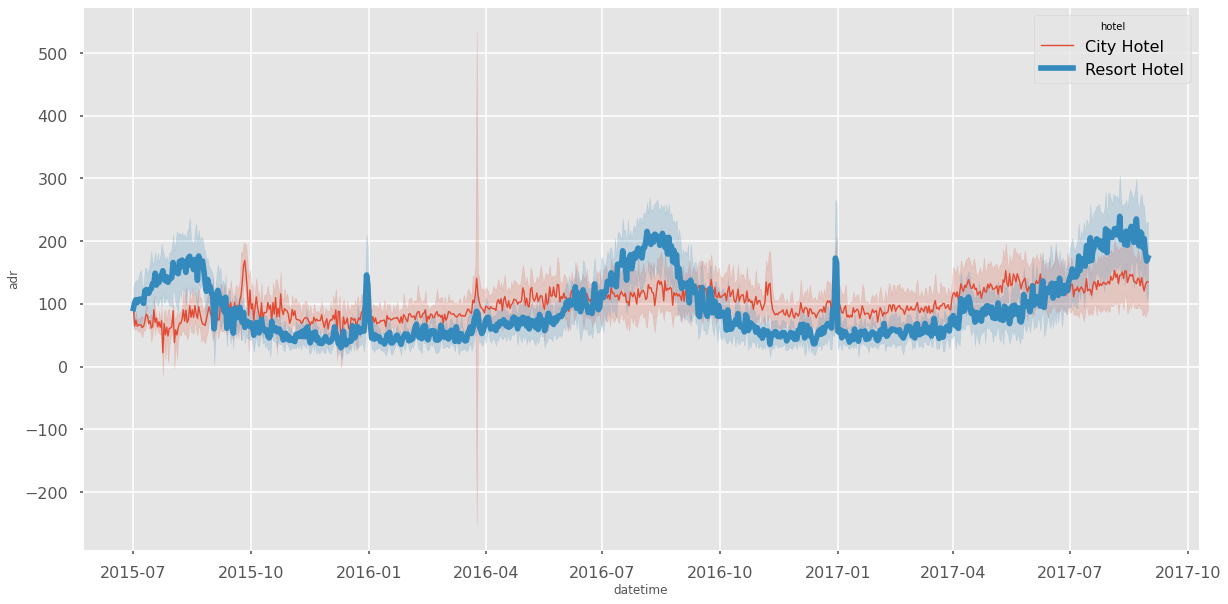

In [82]:
df['arrival_date_month'] = pd.Categorical(df['datetime'], categories = months, ordered = True)
room_prices_mothly = df[["hotel", "datetime", "adr"]].sort_values("datetime")
plt.figure(figsize=(20, 10))
sns.lineplot(x = "datetime", y = "adr", hue = "hotel", data = room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci = "sd", size = "hotel")

<p> Type of meal </p>

<AxesSubplot:xlabel='meal', ylabel='number'>

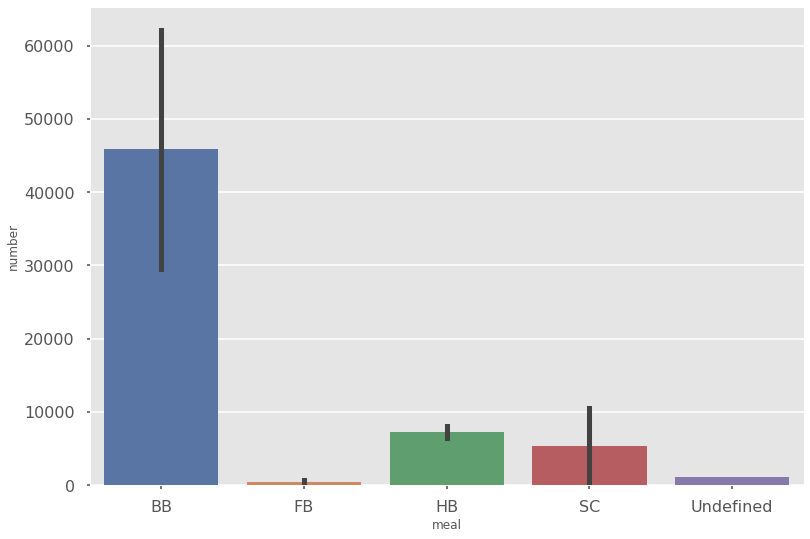

In [83]:
meal_frame = pd.DataFrame(df.groupby(['hotel', 'meal']).count()['index'])
meal_frame = meal_frame.reset_index()
meal_frame.columns = ['hotel', 'meal', 'number']
sns.barplot(x = meal_frame.meal , y = meal_frame.number, palette = "deep")

<p> Most important variables in case of cancellation </p>

In [84]:
cancel_corr = df.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.291555
index                             0.245768
total_of_special_requests         0.235880
number_of_cancellation            0.224909
required_car_parking_spaces       0.195020
booking_changes                   0.145134
previous_cancellations            0.109901
is_repeated_guest                 0.084122
agent                             0.077361
adults                            0.056159
previous_bookings_not_canceled    0.055497
days_in_waiting_list              0.054104
normalized_adr                    0.044806
adr                               0.044806
family                            0.043007
babies                            0.032609
stays_in_week_nights              0.024809
arrival_date_week_number          0.007672
children                          0.004521
stays_in_weekend_nights           0.002210
Name: is_canceled, dtype: float64

## Models

<p> Remove insignificant variables and transform objects variables into dummy variables </p>

In [85]:
del df['customer_type']
del df['deposit_type']
del df['distribution_channel']
del df['market_segment']
del df['reservation_status']
del df['reservation_status_date']
del df['arrival_date_month']

In [86]:
df = pd.get_dummies(df)
df

,datetime,number_of_cancellation,index,adr,adults,agent,arrival_date_week_number,babies,booking_changes,children,...,meal_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L
0,2015-07-01,19,0,0.00,2,87.0,27,0,3,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2015-07-01,19,1,0.00,2,87.0,27,0,4,0.0,...,0,0,0,1,0,0,0,0,0,0
2,2015-07-01,19,2,75.00,1,87.0,27,0,0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,2015-07-01,19,3,75.00,1,304.0,27,0,0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,2015-07-01,19,4,98.00,2,240.0,27,0,0,0.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118897,2017-08-31,45,119381,99.00,2,14.0,35,0,0,0.0,...,0,1,0,0,0,0,0,0,0,0
118898,2017-08-31,45,119383,87.60,2,42.0,35,0,0,0.0,...,0,1,0,0,0,0,0,0,0,0
118899,2017-08-31,45,119386,225.43,3,9.0,35,0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
118900,2017-08-31,45,119387,157.71,2,9.0,35,0,0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [87]:
del df['index']

<p> Prepare dataset for models </p>

In [88]:
X = df.copy() # Features
del X['is_canceled']
del X['datetime']
y = df.is_canceled # Target variable

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
print(X_train.shape, y_train.shape)

(94984, 223) (94984,)


### Feature Scaling

In [90]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [91]:
X_train.head()

,number_of_cancellation,adr,adults,agent,arrival_date_week_number,babies,booking_changes,children,days_in_waiting_list,is_repeated_guest,...,meal_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L
113828,0.018178,2.251958,0.232833,1.497787,0.281996,-0.086692,-0.344626,2.238903,-0.132363,-0.182112,...,-0.098625,0.624366,-0.097806,-0.089691,-0.438648,-0.24083,-0.157002,-0.1339,-0.071714,-0.007948
2461,0.609566,-0.786482,0.232833,-0.832169,0.281996,-0.086692,-0.344626,-0.261390,-0.132363,-0.182112,...,-0.098625,0.624366,-0.097806,-0.089691,-0.438648,-0.24083,-0.157002,-0.1339,-0.071714,-0.007948
90484,-1.119107,1.239995,0.232833,-0.754504,-1.043424,-0.086692,-0.344626,-0.261390,-0.132363,-0.182112,...,-0.098625,-1.601623,-0.097806,-0.089691,-0.438648,4.15230,-0.157002,-0.1339,-0.071714,-0.007948
88198,0.268380,1.011322,-1.456141,1.623993,-1.190693,-0.086692,1.234285,-0.261390,-0.132363,-0.182112,...,-0.098625,0.624366,-0.097806,-0.089691,-0.438648,-0.24083,-0.157002,-0.1339,-0.071714,-0.007948
12735,-0.027314,-0.252063,0.232833,-0.764212,1.018341,-0.086692,1.234285,-0.261390,-0.132363,-0.182112,...,-0.098625,0.624366,-0.097806,-0.089691,-0.438648,-0.24083,-0.157002,-0.1339,-0.071714,-0.007948


<p> List of models </p>

In [92]:
dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

xgb = XGBClassifier(use_label_encoder = False, eval_metric = "logloss")

lgbm = LGBMClassifier()

ada = AdaBoostClassifier()

ex = ExtraTreeClassifier()

### First Evaluation of all models with Holdout method

In [93]:
# Training and testing all classifiers extracting accuracy, and run time.

classifiers = [dt, rf, xgb, lgbm, ada, ex, mlp]
classifier_name = ["DecisionTree", "Random Forest", "XtremeGradientBoosting", "LightGradientBoosting", "AdaBoost", "ExtraTreeClassifier"]
df_results = pd.DataFrame(columns = ['classifier', 'accuracy', 'run_time'])
i = 0
    
for classifier in classifiers:
    # Pipeline
    
    start_time = time()
    classifier.fit(X_train, y_train)
    run_time = time() - start_time
    
    # Test
    predicted = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predicted)
    df_results = df_results.append({'classifier': classifier_name[i], 'accuracy' : accuracy, 'run_time' : run_time}, ignore_index = True)   
    i += 1
    
df_results

[15:01:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


C:\Users\testa\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



,classifier,accuracy,run_time
0,DecisionTree,0.849160,1.638821
1,Random Forest,0.885796,18.827458
2,XtremeGradientBoosting,0.864614,5.781324
3,LightGradientBoosting,0.860403,0.978722
4,AdaBoost,0.824694,9.251184
5,ExtraTreeClassifier,0.827894,0.311069
6,MLP,0.848023,199.532543


<p> Best model is XTremeGradient Boosting, based on the accuracy and the run time <br>
Shap help us to understand which value is very important for our model <br>
[Shap Explanation] https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d </p>

In [158]:
shap.initjs()

In [159]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)

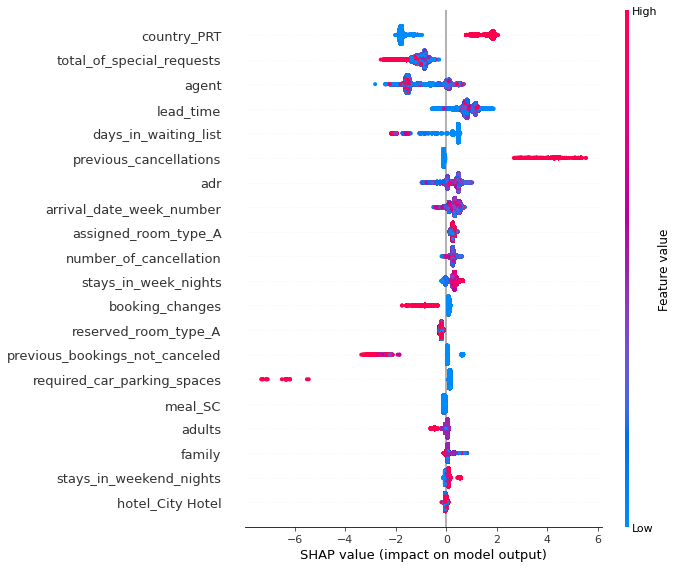

In [160]:
shap.summary_plot(shap_values, features = X, feature_names = X.columns)

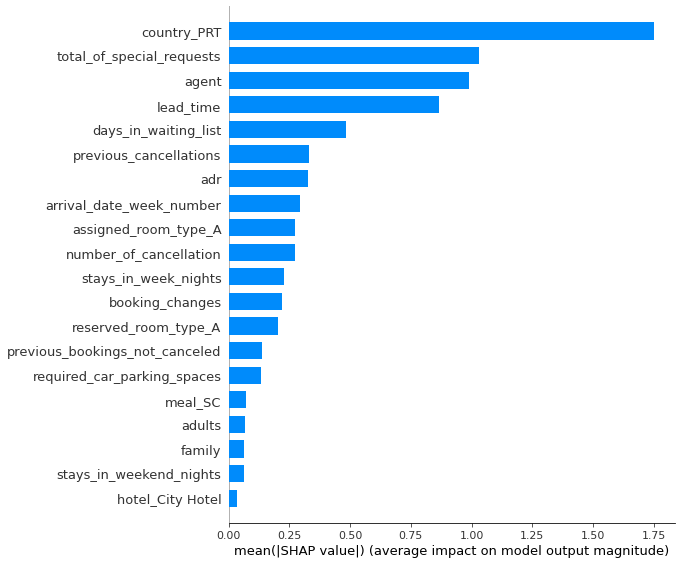

In [161]:
shap.summary_plot(shap_values, features = X, feature_names = X.columns, plot_type = 'bar')

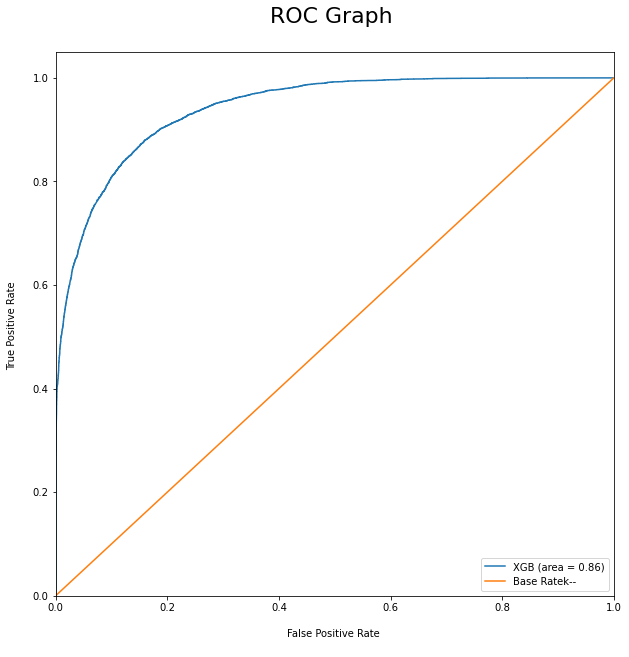

In [162]:
#Evaluate the model using ROC Graph

xgb.fit(X_train, y_train) 
# Predicting the Test set results 
y_pred = xgb.predict(X_test)
probs = xgb.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='XGB (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()

### Second Evaluation of all models with 5 CV

<p> We've decided to remove <b>Random Forest</b> and <b>AdaBoost</b> for an eccessive time of computation </p>

In [165]:
# Training and testing all classifiers extracting accuracy, and run time.
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5, random_state = 0)
classifiers = [dt, xgb, lgbm]
classifier_name = ["DecisionTree", "XtremeGradientBoosting", "LightGradientBoosting"]
df_results = pd.DataFrame(columns = ['classifier', 'accuracy', 'std', 'run_time'])
i = 0
    
for classifier in classifiers:
    
    # Test
    scores = cross_validate(classifier, X, y, cv = cv)
    run_time = scores['fit_time'] + scores['score_time']
    run_time = np.sum(run_time)
    accuracy = scores['test_score'].mean() 
    std = scores['test_score'].std()
    df_results = df_results.append({'classifier': classifier_name[i], 'accuracy' : accuracy, 'std' : std, 'run_time' : run_time}, ignore_index = True)   
    i += 1
    
df_results

,classifier,accuracy,std,run_time
0,DecisionTree,0.852532,0.002145,39.713181
1,XtremeGradientBoosting,0.867794,0.001921,96.881853
2,LightGradientBoosting,0.862513,0.002345,17.653065


<p> Based on Accuracy and Run time we've decided to use XTreme Gradient Boosting </p>

In [166]:
xgb = XGBClassifier(use_label_encoder = False, eval_metric = "logloss")

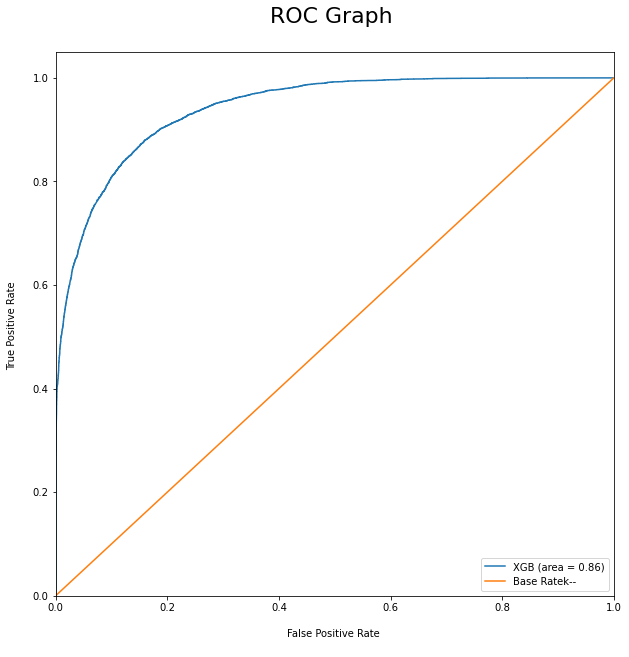

In [167]:
#Evaluate the model using ROC Graph

xgb.fit(X_train, y_train) 
# Predicting the Test set results 
y_pred = xgb.predict(X_test)
probs = xgb.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 10))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label = 'XGB (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc = "lower right", fontsize = "medium")
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.yticks(rotation = 0, horizontalalignment = "right")



plt.show()

Text(0.5, 16.0, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

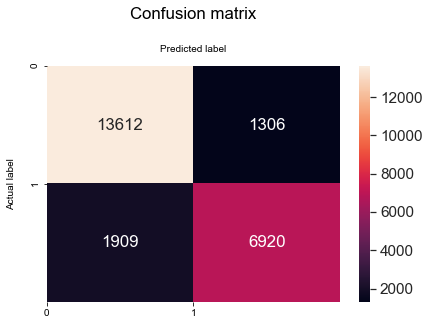

In [168]:
#Visualize results on a Confusion Matrix:
    
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

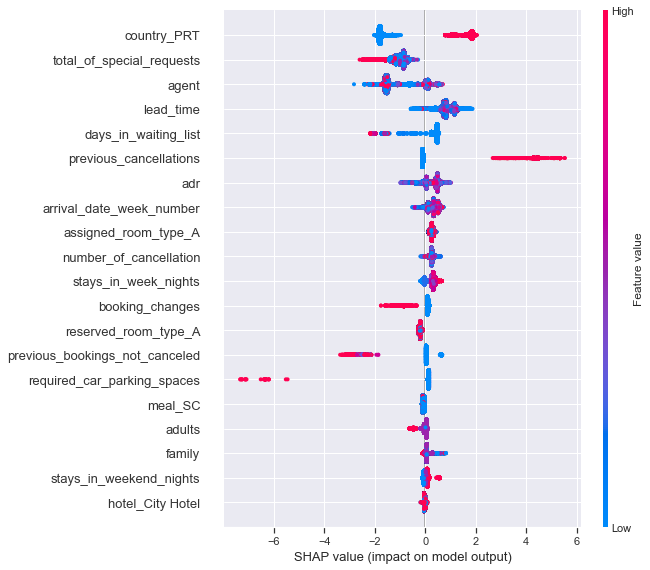

In [169]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, features = X, feature_names = X.columns)

### FIRST GridSearch on XTremeGradient Boosting

In [45]:
xgb_grid = XGBClassifier(tree_method = "hist",  use_label_encoder = False, eval_metric = "logloss", nthread = -1)
param_grid = {
            "n_estimators"     : range(100, 200, 10),
            "learning_rate"    : [0.05, 0.1, 0.3, 0.5],
            "max_depth"        : [3, 5, 7, 10, 12]
            }

cv = RepeatedStratifiedKFold(n_splits = 2, n_repeats = 1, random_state = 0)

grid = GridSearchCV(xgb_grid, param_grid = param_grid, verbose = 1, cv = cv)
start_time = time()
grid.fit(X, y)
run_time = time() - start_time
run_time

Fitting 2 folds for each of 200 candidates, totalling 400 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  8.5min finished


515.3107240200043

In [46]:
grid.best_params_

{'learning_rate': 0.3, 'max_depth': 12, 'n_estimators': 190}

In [170]:
xgb_grid1 = XGBClassifier(tree_method = "hist", use_label_encoder = False, eval_metric = "logloss", learning_rate = 0.3, max_depth = 12, 
                            n_estimators = 190, nthread = -1)

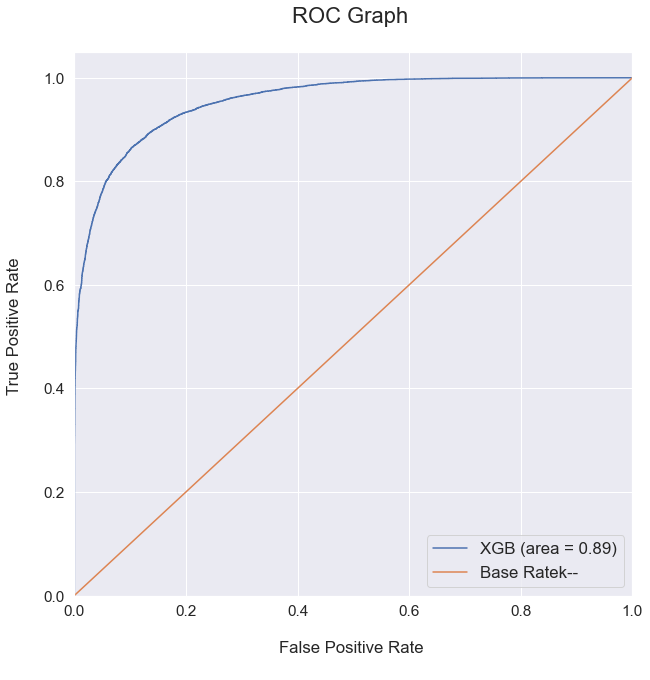

Run Time 2.839137315750122
Accuracy: 0.8895439423927233


In [171]:
#Evaluate the model using ROC Graph

start_time = time()
xgb_grid1.fit(X_train, y_train) 
run_time = time() - start_time
# Predicting the Test set results 
y_pred = xgb_grid1.predict(X_test)
probs = xgb_grid1.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, xgb_grid1.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 10))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label = 'XGB (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc = "lower right", fontsize = "medium")
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.yticks(rotation = 0, horizontalalignment = "right")



plt.show()
print("Run Time", run_time)
print("Accuracy:", accuracy_score(y_test, y_pred))

<Figure size 2016x1440 with 0 Axes>

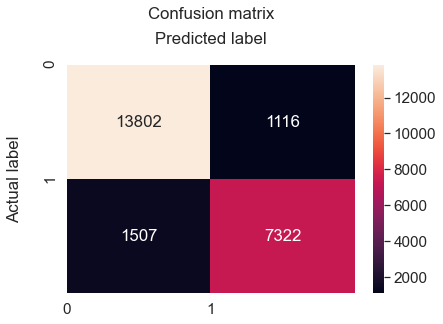

In [172]:
#Visualize results on a Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
accuracy = accuracy_score(y_test, y_pred)

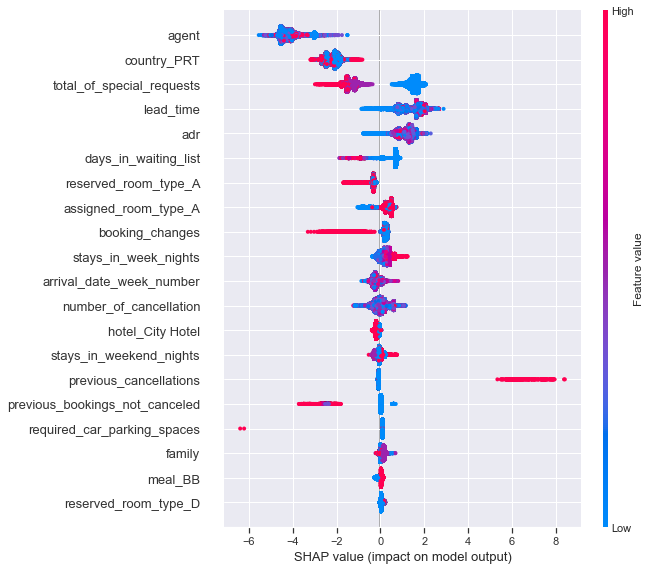

In [173]:
explainer = shap.TreeExplainer(xgb_grid1)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, features = X, feature_names = X.columns)

<p> Accuracy is increased from 0.87 to 0.89 with the GridSearch above, we've decided to improve the GridSearch with a second step of <br> Hyperparameter Tuning. <br>
 We've increased the number of estimators and we want to try to increase the depth of the model. <br>
 Furthermore we've decided to increase the Cross Validation value from 2 to 5</p>

### SECOND GridSearch on XTremeGradient Boosting

In [60]:
xgb_grid2 = XGBClassifier(tree_method = "hist", use_label_encoder = False, eval_metric = "logloss", nthread = -1,
                            learning_rate = 0.3, max_depth = 12, n_estimators = 190)
param_grid = {
            'colsample_bytree': [0.7, 0.8],
            'reg_alpha': [1.1, 1.2, 1.3],
            'reg_lambda': [1.1, 1.2, 1.3],
            }

cv = RepeatedStratifiedKFold(n_splits = 2, n_repeats = 1, random_state = 0)

grid2 = GridSearchCV(xgb_grid2, param_grid = param_grid, verbose = 1, cv = cv)
start_time = time()
grid2.fit(X, y)
run_time = time() - start_time
run_time

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  1.9min finished


119.05768084526062

In [61]:
grid2.best_params_

{'colsample_bytree': 0.7, 'reg_alpha': 1.1, 'reg_lambda': 1.3}

In [174]:
xgb_grid2 = XGBClassifier(tree_method = "hist", use_label_encoder = False, eval_metric = "logloss", nthread = -1,
                            learning_rate = 0.3, max_depth = 12, n_estimators = 190, colsample_bytree = 0.7)

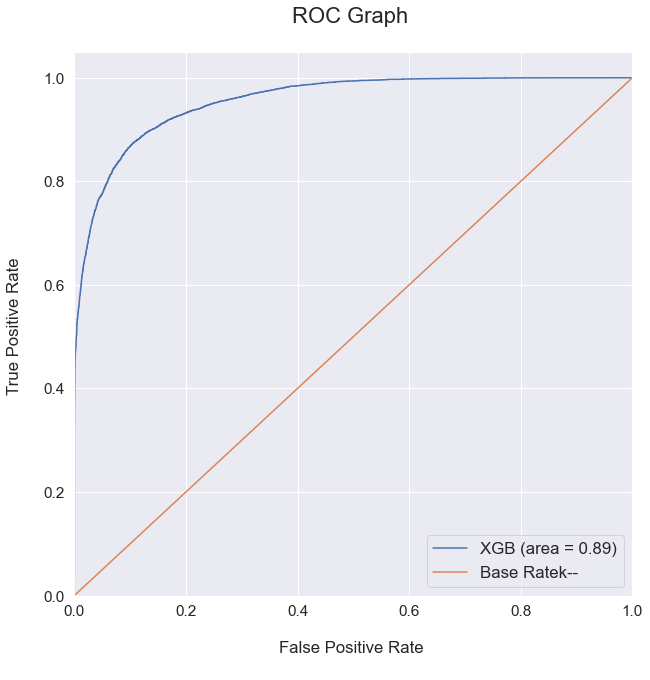

Run Time 2.871166706085205
Accuracy: 0.8901756011285636


In [175]:
start_time = time()
xgb_grid2.fit(X_train, y_train)
run_time = time() - start_time 
# Predicting the Test set results 
y_pred = xgb_grid2.predict(X_test)
probs = xgb_grid2.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, xgb_grid2.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 10))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label = 'XGB (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc = "lower right", fontsize = "medium")
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.yticks(rotation = 0, horizontalalignment = "right")



plt.show()

print("Run Time", run_time)
print("Accuracy:", accuracy_score(y_test, y_pred))

<Figure size 2016x1440 with 0 Axes>

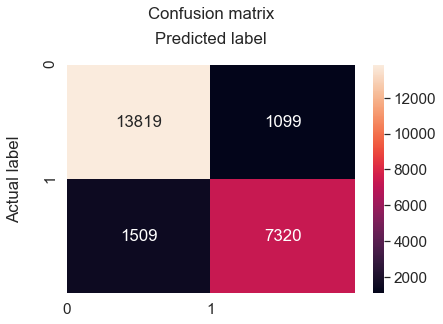

In [176]:
#Visualize results on a Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
explainer = shap.TreeExplainer(xgb_grid2)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, features = X, feature_names = X.columns)

# Conclusions
<style>
table {
border-collapse:collapse;
align : center
}
td, th {
border:1px solid #ddd;
padding:8px;
}
</style>

<p> It was decided to use XTreme Gradient Boosting from the start given the best performance both in terms of efficiency and effectiveness. <br>
From here it was decided to perform two GridSearch to search for the best hyperparameters of the model <br>
Below a table with the final results and the plot of the best model <br>
<table>
<tr><td>Model</td><td>Accuracy</td><td> Run Time</td></tr>
<tr><td> Base XGB </td><td>0.87</td><td>4 secs </td></tr>
<tr><td> XGB GridSearch 1 </td><td>0.893</td><td> 2.8 secs </td></tr>
<tr><td> XGB GridSearch 2 </td><td>0.891</td><td>3.1 secs </td></tr>
</table>
</p>

## Neural Networks

In [178]:
model = Sequential()
model.add(Flatten(input_dim = 223))
model.add(Dense(200, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(200, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(200, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
# Compile model
#opt = keras.optimizer.SGD(lr=0.01, momentum=0.9)
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['binary_accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 223)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               44800     
_________________________________________________________________
batch_normalization_5 (Batch (None, 200)               800       
_________________________________________________________________
dense_7 (Dense)              (None, 200)               40200     
_________________________________________________________________
batch_normalization_6 (Batch (None, 200)               800       
_________________________________________________________________
dense_8 (Dense)              (None, 200)               40200     
_________________________________________________________________
batch_normalization_7 (Batch (None, 200)              

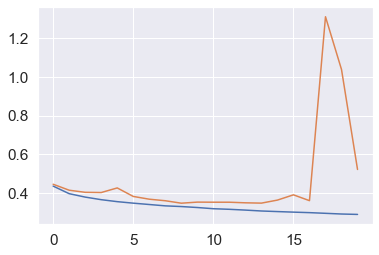

In [179]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

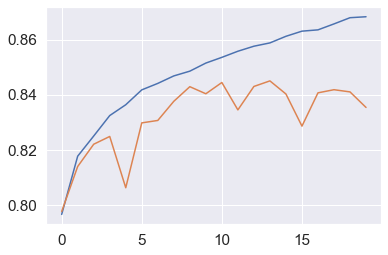

In [180]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])

In [181]:
model.evaluate(X_test, y_test, verbose = 1)

743/743 [==============================] - 0s 614us/step - loss: 0.5206 - binary_accuracy: 0.8353


[0.5205738544464111, 0.8353476524353027]